#Name - Arjun A.
#Roll number - 181CO109
#Date of submission - 05-4-2021
This notebook was written in google colab. <br>Link to view notebook<br>
https://colab.research.google.com/drive/1n6YBuFNPewJGj8w4cBZaupaES98NTJ2O?usp=sharing

# Importing packages
Numpy - Computations <br>
Matplotlib - for plotting a graph

In [14]:
import numpy as np
from matplotlib import pyplot as plt

# Sigmoid function
Function representing the mathematical Sigmoid function <br> 
Sig(z) = $\frac{1}{1+e^{-z}}$

In [15]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

# Initializing all the neural network parameters
Initializing bias = 0 <br>
The names of the parameters are intuitive. 

In [16]:
def initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures):
    W1 = np.random.randn(neuronsInHiddenLayers, inputFeatures)
    W2 = np.random.randn(outputFeatures, neuronsInHiddenLayers)
    b1 = np.zeros((neuronsInHiddenLayers, 1))
    b2 = np.zeros((outputFeatures, 1))
      
    parameters = {"W1" : W1, "b1": b1, "W2" : W2, "b2": b2}
    return parameters

# Forward Propagation

In [17]:
def forwardPropagation(X, Y, parameters):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
  
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
  
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = -np.sum(logprobs) / m
    return cost, cache, A2

# Backward Propagation

In [18]:
def backwardPropagation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache
      
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis = 1, keepdims = True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, A1 * (1- A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis = 1, keepdims = True) / m
      
    gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    return gradients

# Updating the weights based on the negative gradient

In [19]:
def updateParameters(parameters, gradients, learningRate):
    parameters["W1"] = parameters["W1"] - learningRate * gradients["dW1"]
    parameters["W2"] = parameters["W2"] - learningRate * gradients["dW2"]
    parameters["b1"] = parameters["b1"] - learningRate * gradients["db1"]
    parameters["b2"] = parameters["b2"] - learningRate * gradients["db2"]
    return parameters

# Training the model to learn the NOR truth table

In [20]:
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # NOR input
Y = np.array([[1, 0, 0, 0]]) # NOR output

# Defining model parameters
Number of hidden layer neurons = 2 <br>
Number of input features = 2 <br> 
Number of output features = 1 <br>

In [21]:
neuronsInHiddenLayers = 2 
inputFeatures = X.shape[0] 
outputFeatures = Y.shape[0] 
parameters = initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures)
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1))
for i in range(epoch):
    losses[i, 0], cache, A2 = forwardPropagation(X, Y, parameters)
    gradients = backwardPropagation(X, Y, cache)
    parameters = updateParameters(parameters, gradients, learningRate)

# Testing the model with different values of x1 and x2
Testing can be done with a different permutation of the AND inputs compared to the inputs the model was trained on. 

In [22]:
X = np.array([[1, 1, 1, 0], [0, 1, 0, 0]])
cost, _, A2 = forwardPropagation(X, Y, parameters)
prediction = (A2 > 0.5) * 1.0 # Measuring probability >50% and assigning values

# Printing table, P -> Probability that it is 1
print('X0| X1| P      | Y')
print('--|---|--------|--')
for i in range(0,4):
  print('{} | {} | {} | {}'.format(X[0, i], X[1, i], round((float(A2[0, i])), 4), int(prediction[0,i])))


X0| X1| P      | Y
--|---|--------|--
1 | 0 | 0.0027 | 0
1 | 1 | 0.0006 | 0
1 | 0 | 0.0027 | 0
0 | 0 | 0.9941 | 1


In [23]:
X = np.array([[1, 1, 1, 0], [1, 0, 0, 1]])
cost, _, A2 = forwardPropagation(X, Y, parameters)
prediction = (A2 > 0.5) * 1.0 # Measuring probability >50% and assigning values

# Printing table, P -> Probability that it is 1
print('X0| X1| P      | Y')
print('--|---|--------|--')
for i in range(0,4):
  print('{} | {} | {} | {}'.format(X[0, i], X[1, i], round((float(A2[0, i])), 4), int(prediction[0,i])))


X0| X1| P      | Y
--|---|--------|--
1 | 1 | 0.0006 | 0
1 | 0 | 0.0027 | 0
1 | 0 | 0.0027 | 0
0 | 1 | 0.0026 | 0


In [24]:
X = np.array([[0, 0, 0, 1], [1, 0, 1, 1]])
cost, _, A2 = forwardPropagation(X, Y, parameters)
prediction = (A2 > 0.5) * 1.0 # Measuring probability >50% and assigning values

# Printing table, P -> Probability that it is 1
print('X0| X1| P      | Y')
print('--|---|--------|--')
for i in range(0,4):
  print('{} | {} | {} | {}'.format(X[0, i], X[1, i], round((float(A2[0, i])), 4), int(prediction[0,i])))


X0| X1| P      | Y
--|---|--------|--
0 | 1 | 0.0026 | 0
0 | 0 | 0.9941 | 1
0 | 1 | 0.0026 | 0
1 | 1 | 0.0006 | 0


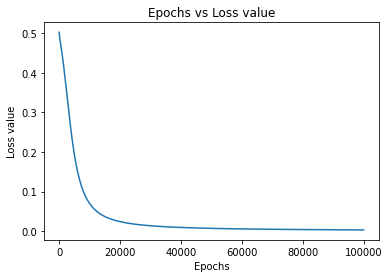

In [25]:
# Mathplotlb for plotting a graph between the Number of epochs and Loss value. 

plt.figure()
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss value")
plt.title('Epochs vs Loss value')
plt.savefig('181CO109 graph.pdf')
plt.show()

##*Printing the parameters of the ANN* 

In [26]:
print(parameters)

{'W1': array([[ 4.75565994,  4.68563177],
       [-3.10115164, -3.18892793]]), 'b1': array([[-2.29548336],
       [ 1.476171  ]]), 'W2': array([[-9.05808398,  5.43336577]]), 'b2': array([[1.52549002]])}
